# 🛠️ EDA - ANÁLISIS EXPLORATORIO DE LOS DATOS

---
## 📦 Importación de librerías
---

In [1]:
# =============================================================
# ⚙️ Configuración inicial de entorno y librerías para limpieza
# -------------------------------------------------------------
# ➤ Importa librerías principales: pandas, numpy, matplotlib, seaborn.
# ➤ Configura estilos y formato de impresión en Jupyter.
# ➤ Mejora la visualización y autocompletado en notebooks.
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# 🎯 Configuración de visualización
pd.options.display.float_format = '{:.2f}'.format    # Evita notación científica
pd.set_option('display.max_columns', None)           # Muestra todas las columnas
pd.set_option('display.max_colwidth', None)          # Muestra todo el contenido de celdas

# 🎯 Estilo visual en Jupyter
from IPython.display import display, HTML
display(HTML("""<style> th { text-align: center !important; font-weight: bold !important; } </style>"""))

# 🧠 Mejora el autocompletado en Jupyter mostrando sugerencias incluso dentro de objetos anidados (como df['col'].str.)
%config IPCompleter.greedy = True  

# 📊 Asegura que los gráficos de Matplotlib se muestren directamente en las celdas del notebook
%matplotlib inline 

---
## 📥 Configuración del entorno para importar módulos internos
---

In [2]:
# =============================================================
# 🧭 Configuración del entorno para importar módulos internos
# -------------------------------------------------------------
# ➤ Añade la ruta del proyecto al sys.path para importar desde 'src'.
# ➤ Llama a la función `configurar_entorno()` si ya está disponible.
# ➤ Importa funciones necesarias desde módulos utilitarios.
# =============================================================

from pathlib import Path
import sys

# Añadir ruta a 'src/' si no está ya incluida (solo para Jupyter)
project_root = Path.cwd().resolve().parents[0]
src_path = project_root / "src"
if src_path.exists() and str(src_path) not in sys.path:
    sys.path.append(str(src_path))

# ✅ Importar configuración del entorno desde utils
from utils import configurar_entorno, get_file_path, load_data

# Ejecutar configuración del entorno
configurar_entorno()

---
## 📥 Carga de datos originales
---

In [3]:
# =============================================================
# 📦 Carga de datos de trabajo, categóricos y numéricos
# -------------------------------------------------------------
# ➤ Si existe el archivo .pkl, lo carga desde cache.
# ➤ Si no, lo carga desde el archivo CSV procesado.
# ➤ Muestra información general de cada DataFrame.
# =============================================================

from eda import cargar_dataframes

df  = cargar_dataframes("trabajo_cleaning", "df")
cat = cargar_dataframes("cat_cleaning", "cat")
num = cargar_dataframes("num_cleaning", "num")

# ✅ Vista previa
for nombre, dataset in {"df": df, "cat": cat, "num": num}.items():
    print(f"\n✅ Vista previa del DataFrame `{nombre}`:")
    display(dataset)


📦 Cargando df desde Pickle...

📦 Cargando cat desde Pickle...

📦 Cargando num desde Pickle...

✅ Vista previa del DataFrame `df`:


,empleo,antiguedad_empleo,ingresos,ingresos_verificados,rating,dti,vivienda,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,finalidad,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,estado,imp_recuperado
0,Hvac technician,3.00,54000.00,Source Verified,A,19.31,MORTGAGE,2.00,10.00,33.30,45.20,0.00,0.00,10.00,debt_consolidation,15000.00,7.21,36.00,464.60,2669.06,Current,0.00
1,"Target Promotions and Marketing,Inc",10.00,65000.00,Not Verified,D,25.40,RENT,1.00,15.00,85.70,86.20,0.00,0.00,0.00,debt_consolidation,10000.00,17.77,36.00,360.38,6362.96,Charged Off,0.00
2,Banker,5.00,135000.00,Verified,A,14.68,RENT,0.00,19.00,0.00,16.30,0.00,0.00,0.00,debt_consolidation,24000.00,6.39,36.00,734.38,24000.00,Fully Paid,0.00
3,executive director,9.00,188000.00,Source Verified,B,11.69,MORTGAGE,3.00,15.00,0.00,3.30,0.00,0.00,0.00,credit_card,27000.00,8.99,60.00,560.35,12443.00,Current,0.00
4,Subsea Technician,7.00,125000.00,Source Verified,B,9.00,MORTGAGE,1.00,6.00,33.30,69.90,0.00,0.00,16.00,debt_consolidation,22000.00,10.90,36.00,719.22,22000.00,Fully Paid,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Office Manager,10.00,42000.00,Not Verified,C,20.85,MORTGAGE,6.00,9.00,100.00,81.60,0.00,0.00,13.00,debt_consolidation,8000.00,12.29,36.00,266.83,8000.00,Fully Paid,0.00
199996,Owner & President,6.00,111697.00,Verified,B,16.63,MORTGAGE,2.00,10.00,50.00,26.30,0.00,1.00,6.00,other,10000.00,9.44,36.00,320.05,4388.51,Current,0.00
199997,Sr. Field Engineer,10.00,285000.00,Source Verified,D,6.02,MORTGAGE,3.00,9.00,25.00,21.10,0.00,0.00,25.00,small_business,30000.00,17.47,36.00,1076.62,5387.53,Current,0.00
199998,Attorney,8.00,168000.00,Source Verified,E,4.69,RENT,0.00,8.00,0.00,52.40,0.00,2.00,0.00,small_business,30050.00,18.25,60.00,767.17,2964.44,Charged Off,2750.88



✅ Vista previa del DataFrame `cat`:


,empleo,ingresos_verificados,rating,vivienda,finalidad,estado
0,Hvac technician,Source Verified,A,MORTGAGE,debt_consolidation,Current
1,"Target Promotions and Marketing,Inc",Not Verified,D,RENT,debt_consolidation,Charged Off
2,Banker,Verified,A,RENT,debt_consolidation,Fully Paid
3,executive director,Source Verified,B,MORTGAGE,credit_card,Current
4,Subsea Technician,Source Verified,B,MORTGAGE,debt_consolidation,Fully Paid
...,...,...,...,...,...,...
199995,Office Manager,Not Verified,C,MORTGAGE,debt_consolidation,Fully Paid
199996,Owner & President,Verified,B,MORTGAGE,other,Current
199997,Sr. Field Engineer,Source Verified,D,MORTGAGE,small_business,Current
199998,Attorney,Source Verified,E,RENT,small_business,Charged Off



✅ Vista previa del DataFrame `num`:


,antiguedad_empleo,ingresos,dti,num_hipotecas,num_lineas_credito,porc_tarjetas_75p,porc_uso_revolving,num_cancelaciones_12meses,num_derogatorios,num_meses_desde_ult_retraso,principal,tipo_interes,num_cuotas,imp_cuota,imp_amortizado,imp_recuperado
0,3.00,54000.00,19.31,2.00,10.00,33.30,45.20,0.00,0.00,10.00,15000.00,7.21,36.00,464.60,2669.06,0.00
1,10.00,65000.00,25.40,1.00,15.00,85.70,86.20,0.00,0.00,0.00,10000.00,17.77,36.00,360.38,6362.96,0.00
2,5.00,135000.00,14.68,0.00,19.00,0.00,16.30,0.00,0.00,0.00,24000.00,6.39,36.00,734.38,24000.00,0.00
3,9.00,188000.00,11.69,3.00,15.00,0.00,3.30,0.00,0.00,0.00,27000.00,8.99,60.00,560.35,12443.00,0.00
4,7.00,125000.00,9.00,1.00,6.00,33.30,69.90,0.00,0.00,16.00,22000.00,10.90,36.00,719.22,22000.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,10.00,42000.00,20.85,6.00,9.00,100.00,81.60,0.00,0.00,13.00,8000.00,12.29,36.00,266.83,8000.00,0.00
199996,6.00,111697.00,16.63,2.00,10.00,50.00,26.30,0.00,1.00,6.00,10000.00,9.44,36.00,320.05,4388.51,0.00
199997,10.00,285000.00,6.02,3.00,9.00,25.00,21.10,0.00,0.00,25.00,30000.00,17.47,36.00,1076.62,5387.53,0.00
199998,8.00,168000.00,4.69,0.00,8.00,0.00,52.40,0.00,2.00,0.00,30050.00,18.25,60.00,767.17,2964.44,2750.88


---
## 📥 Revisión general
---

In [4]:
# =============================================================
# 🔍 Revisión general del dataset principal (df)
# -------------------------------------------------------------
# ➤ Evalúa dimensiones, tipos de variables, duplicados y nulos.
# ➤ Verifica relación registros / variables para evitar sobreajuste.
# ➤ Resume hallazgos y acciones recomendadas.
# =============================================================

from utils import verificar_dimensionalidad

# 1. Dimensiones generales y duplicados
print("\n📏 Dimensiones del dataset:")
print(f"Registros: {df.shape[0]:,} | Columnas: {df.shape[1]}")
print(f"Duplicados: {df.duplicated().sum():,}")

# 2. Tipos de variables
print("\n🔠 Tipos de variables:")
display(df.dtypes.value_counts())

# 3. Valores nulos (porcentaje)
print("\n🧼 Porcentaje de valores nulos por variable:")
porcentaje_nulos = df.isna().mean().sort_values(ascending=False) * 100
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0]
display(porcentaje_nulos)

# 4. Verificación de dimensionalidad
verificar_dimensionalidad(df)

# 5. Conclusiones y acciones
print("""
📌 CONCLUSIONES:
- No se detectan valores nulos relevantes tras la limpieza previa.
- No hay duplicados en el dataset consolidado.
- La relación registros/columnas es adecuada para evitar sobreajuste.
- Se identifican los tipos de variables como paso previo a su tratamiento.

🛠️ ACCIONES A REALIZAR:
- Las transformaciones necesarias (normalización, codificación) se implementarán en el notebook 04_feature_engineering.ipynb.
- Se utilizarán estas observaciones para definir estrategias de transformación por tipo de variable.
""")


📏 Dimensiones del dataset:
Registros: 198,679 | Columnas: 22
Duplicados: 0

🔠 Tipos de variables:


float64    16
object      6
Name: count, dtype: int64


🧼 Porcentaje de valores nulos por variable:


Series([], dtype: float64)


📊 Verificación de la dimensionalidad:
✅ Adecuado: 198679 registros ≥ 22 variables x 100
   No se detectan problemas de sobreajuste por alta dimensionalidad.
📈 Ratio registros/variable: 9030.86


📌 CONCLUSIONES:
- No se detectan valores nulos relevantes tras la limpieza previa.
- No hay duplicados en el dataset consolidado.
- La relación registros/columnas es adecuada para evitar sobreajuste.
- Se identifican los tipos de variables como paso previo a su tratamiento.

🛠️ ACCIONES A REALIZAR:
- Las transformaciones necesarias (normalización, codificación) se implementarán en el notebook 04_feature_engineering.ipynb.
- Se utilizarán estas observaciones para definir estrategias de transformación por tipo de variable.



---
## Distribución de la variable objetivo (estado)
---

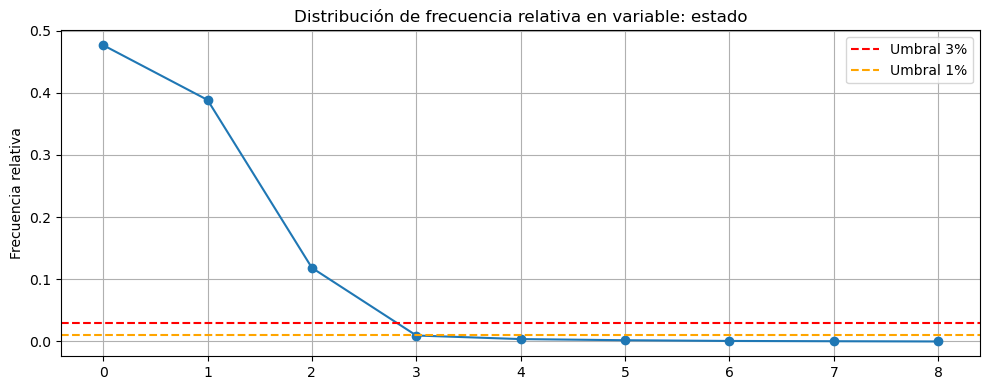

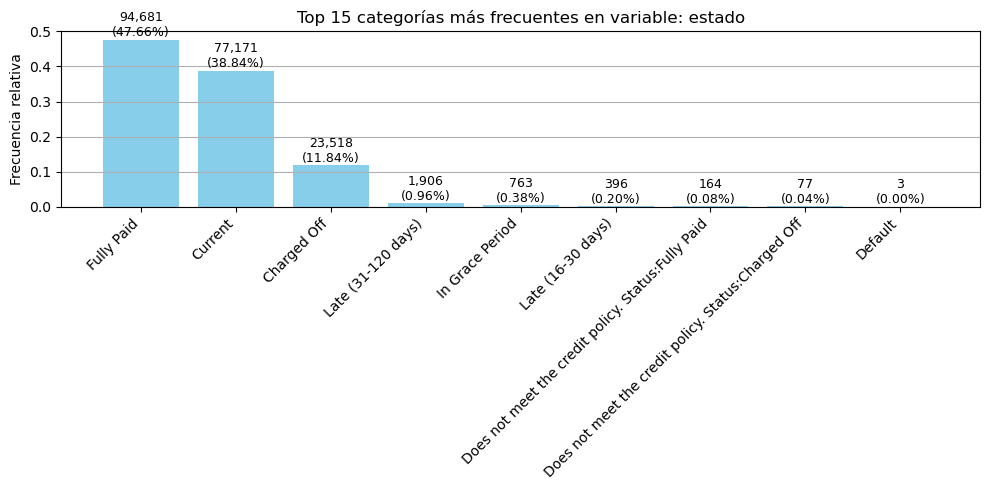


📌 CONCLUSIONES:
- La variable objetivo 'estado' presenta un leve desbalance.
- Se interpreta como: 0 = cliente cumplidor, 1 = cliente con impago.
- Las clases están correctamente etiquetadas o pueden transformarse en el siguiente paso.

🛠️ ACCIONES A REALIZAR:
- Evaluar técnicas de balanceo si el desbalance afecta el rendimiento.
- Mantener esta codificación para los modelos de clasificación.
- Si 'estado' está en texto, transformarla en 04_feature_engineering.ipynb así:
    • 1 = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']
    • 0 = resto de categorías.



In [5]:
# =============================================================
# 🎯 Distribución de la variable objetivo (estado)
# -------------------------------------------------------------
# ➤ Visualiza frecuencias relativas y absolutas mediante función importada desde eda.py.
# ➤ Resume hallazgos y define transformación binaria si aplica.
# =============================================================

# ✅ Importar función de visualización categórica si no lo hiciste antes
from eda import plot_cat_distribution

# ✅ Aplicar gráfico a la variable objetivo
plot_cat_distribution(cat, "estado")

# ✅ Conclusiones y acciones asociadas
print("""
📌 CONCLUSIONES:
- La variable objetivo 'estado' presenta un leve desbalance.
- Se interpreta como: 0 = cliente cumplidor, 1 = cliente con impago.
- Las clases están correctamente etiquetadas o pueden transformarse en el siguiente paso.

🛠️ ACCIONES A REALIZAR:
- Evaluar técnicas de balanceo si el desbalance afecta el rendimiento.
- Mantener esta codificación para los modelos de clasificación.
- Si 'estado' está en texto, transformarla en 04_feature_engineering.ipynb así:
    • 1 = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']
    • 0 = resto de categorías.
""")


---
## Distribución del resto de variables categoricas
---



📌 Variable categórica: EMPLEO


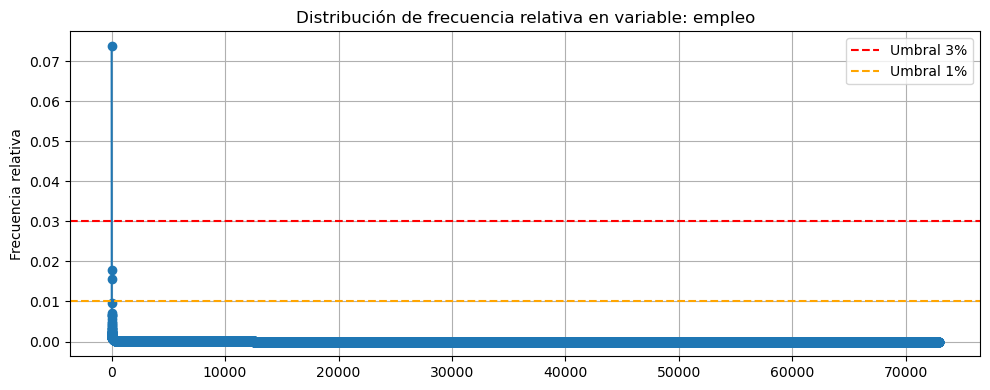

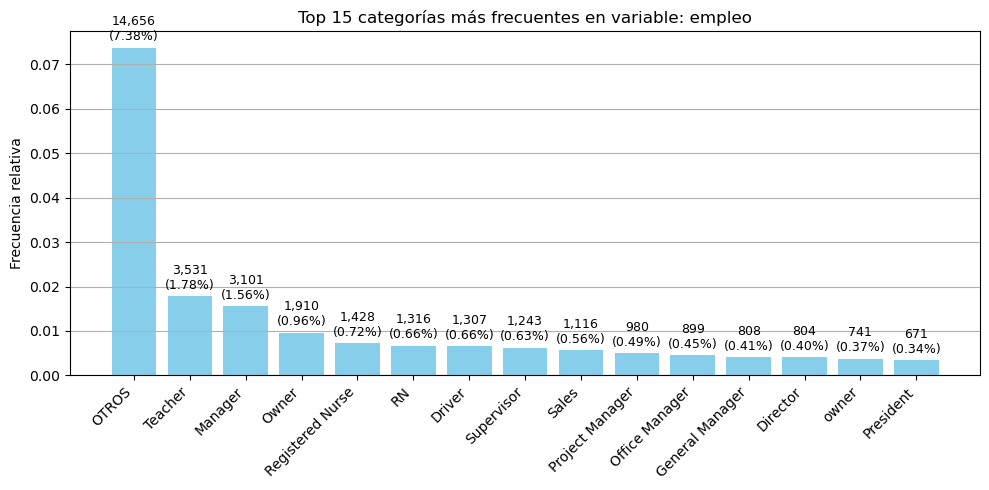

📝 CONCLUSIONES:
• Alta cardinalidad con muchas categorías poco frecuentes. Requiere agrupación en 'OTROS'.

🛠️ ACCIONES A REALIZAR:
• Agrupar categorías poco frecuentes como 'OTROS' en 04_feature_engineering.ipynb.


📌 Variable categórica: INGRESOS_VERIFICADOS


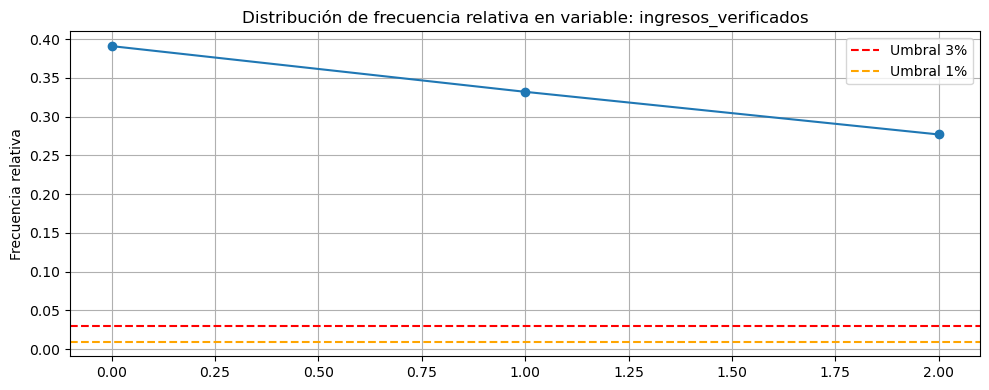

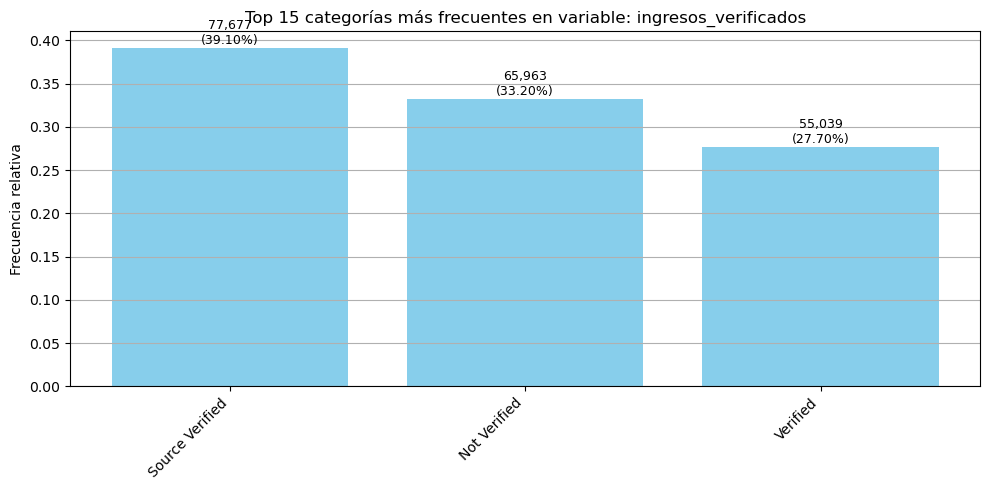

📝 CONCLUSIONES:
• Solo tres categorías comunes. Puede transformarse con dummies sin problemas.

🛠️ ACCIONES A REALIZAR:
• Convertir a variables dummies si se mantiene la representación actual.


📌 Variable categórica: RATING


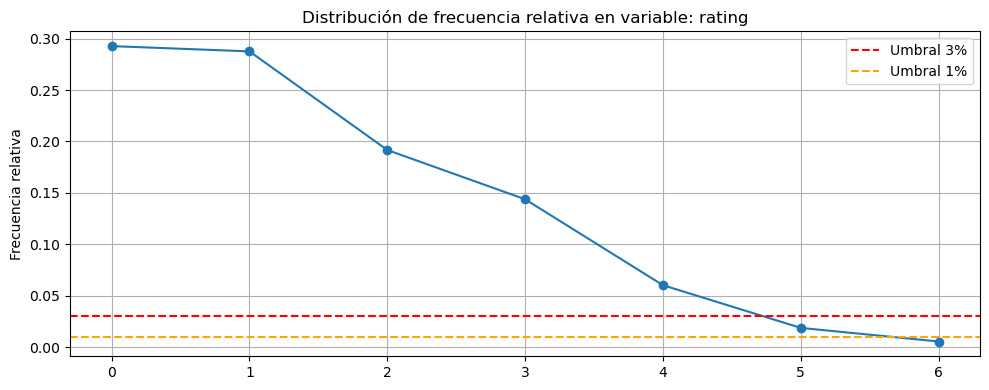

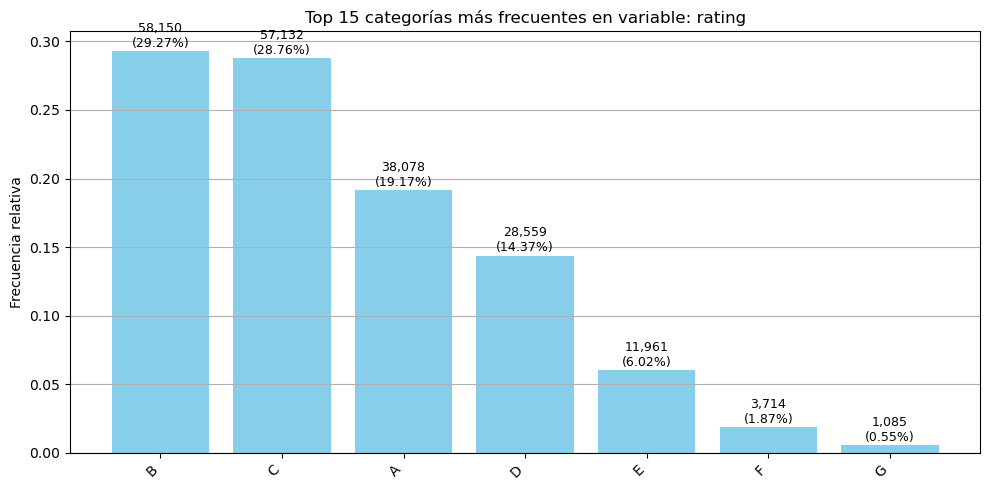

📝 CONCLUSIONES:
• Categorías como 'F' y 'G' son poco frecuentes. Podrían agruparse como 'rating_bajo'.

🛠️ ACCIONES A REALIZAR:
• Evaluar agrupación o recategorización en el paso de ingeniería de variables.


📌 Variable categórica: VIVIENDA


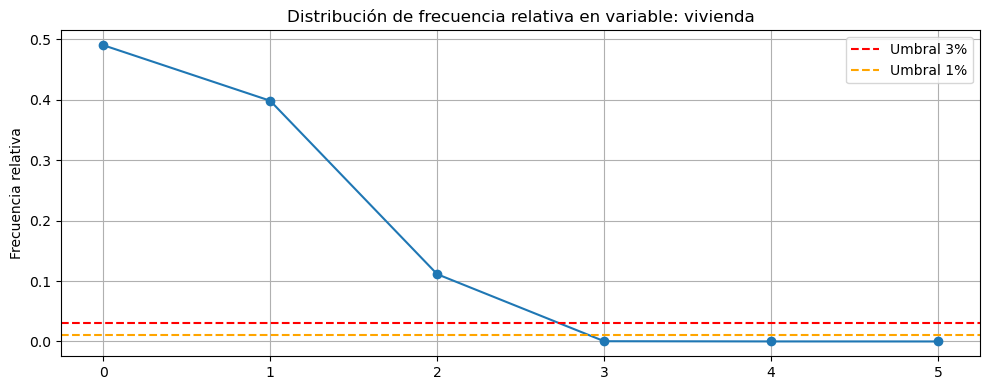

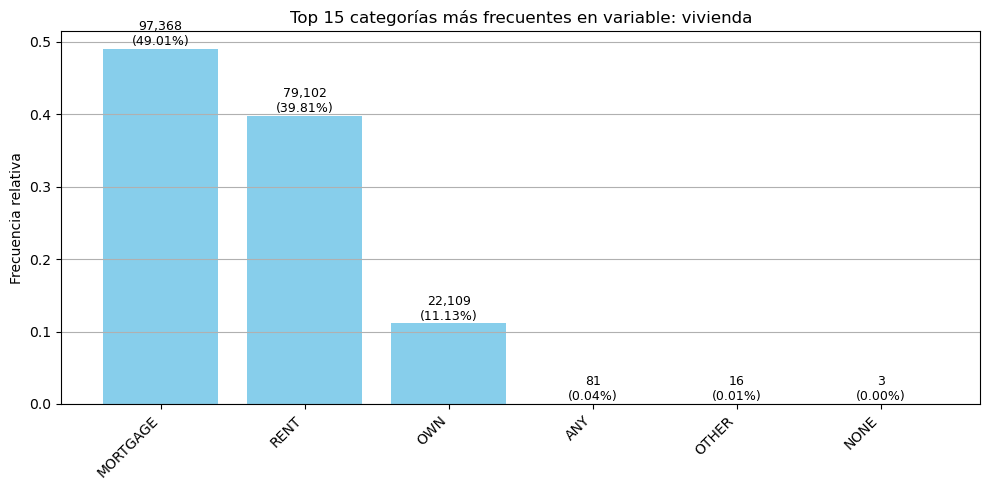

📝 CONCLUSIONES:
• Tiene una categoría poco representada ('OTROS'). Puede combinarse con otra.

🛠️ ACCIONES A REALIZAR:
• Evaluar agrupación o recategorización en el paso de ingeniería de variables.


📌 Variable categórica: FINALIDAD


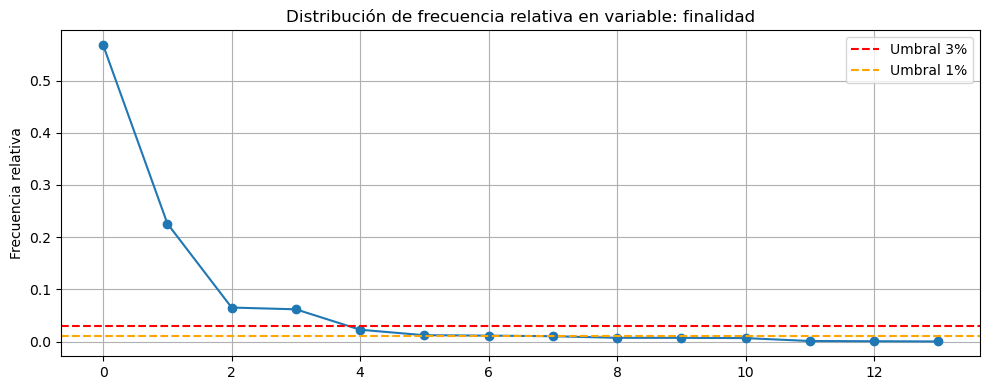

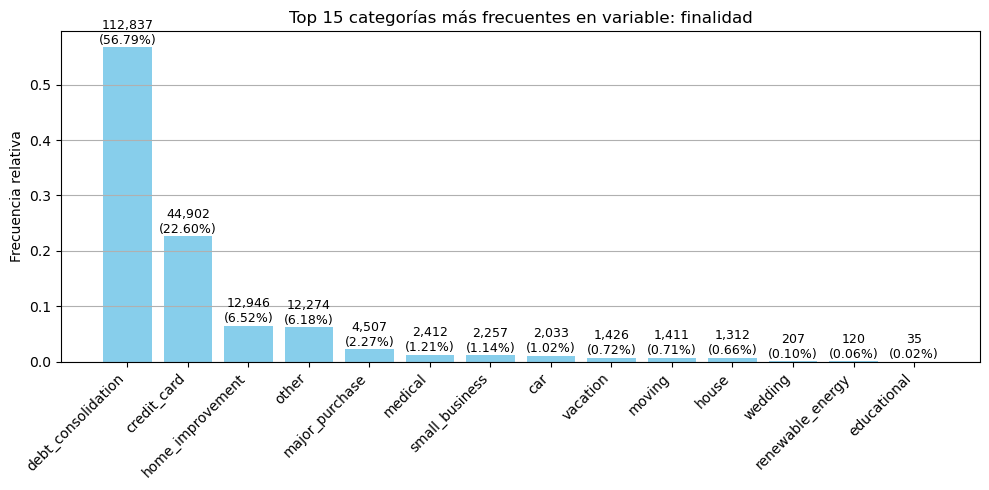

📝 CONCLUSIONES:
• Distribución diversa. Evaluar agrupación semántica o por frecuencia.

🛠️ ACCIONES A REALIZAR:
• Evaluar agrupación o recategorización en el paso de ingeniería de variables.


In [6]:
# =============================================================
# 📊 Análisis univariado de variables categóricas (excluyendo 'estado')
# -------------------------------------------------------------
# ➤ Aplica análisis gráfico y textual a cada variable categórica.
# ➤ Usa lógica semiautomática para conclusiones y próximas acciones.
# ➤ La función está definida en eda.py para mantener el notebook limpio.
# =============================================================

from eda import analizar_categoricas_univariado

# Aplicar análisis univariado a todas las variables categóricas excepto 'estado'
analizar_categoricas_univariado(cat, excluir_cols=["estado"])

---
## Distribución  de variables numericas
---



📌 Variable numérica: ANTIGUEDAD_EMPLEO


,count,mean,std,min,25%,50%,75%,max
antiguedad_empleo,198679.00,6.01,3.46,1.00,3.00,6.00,10.00,10.00


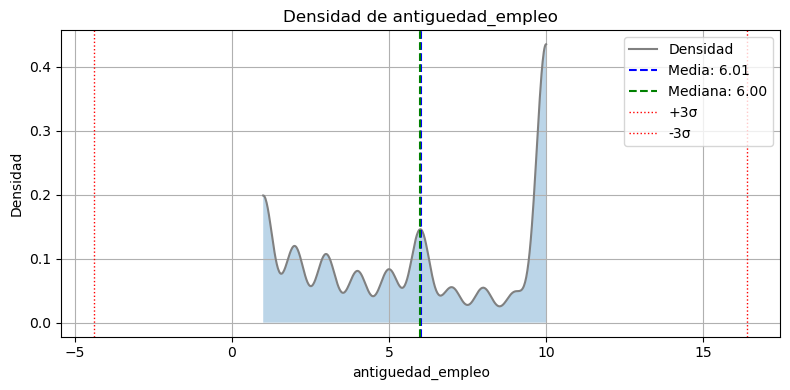

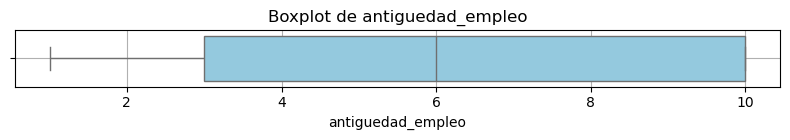

📝 CONCLUSIONES:
• Distribución razonable para modelado directo.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: INGRESOS


,count,mean,std,min,25%,50%,75%,max
ingresos,198679.00,75095.45,42247.93,0.00,46000.00,65000.00,92000.00,300000.00


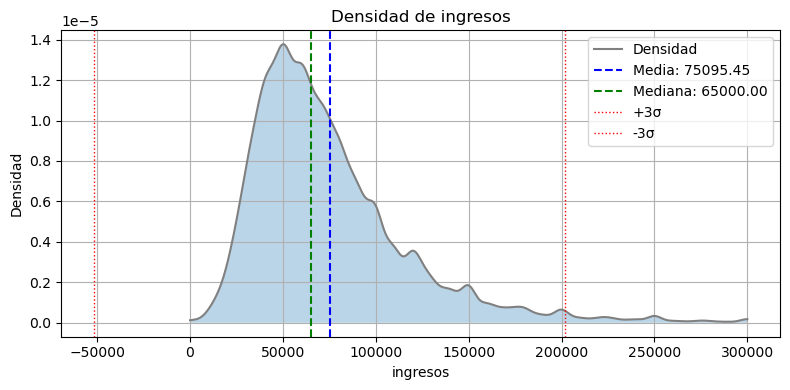

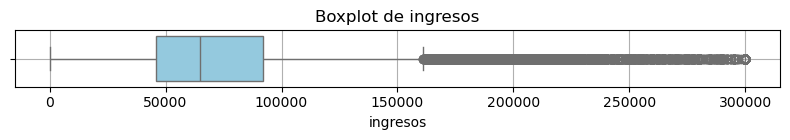

📝 CONCLUSIONES:
• Alto rango de valores. Puede ser útil aplicar escalado.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: DTI


,count,mean,std,min,25%,50%,75%,max
dti,198679.00,18.87,14.56,-1.00,12.00,17.85,24.48,999.00


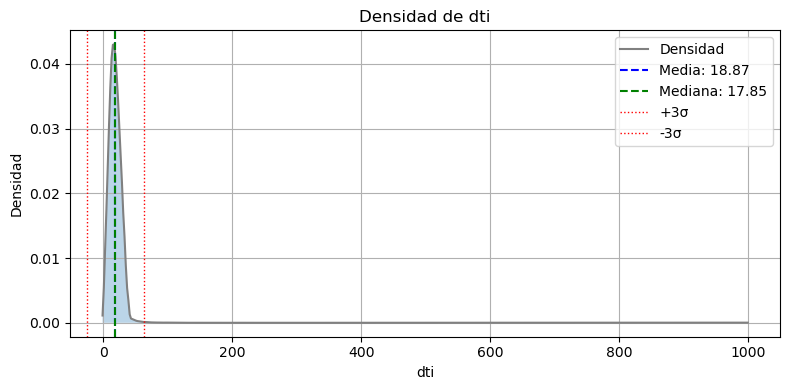

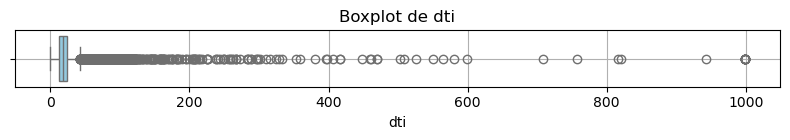

📝 CONCLUSIONES:
• Distribución muy asimétrica. Puede requerir transformación logarítmica.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: NUM_HIPOTECAS


,count,mean,std,min,25%,50%,75%,max
num_hipotecas,198679.00,1.51,1.88,0.00,0.00,1.00,2.00,32.00


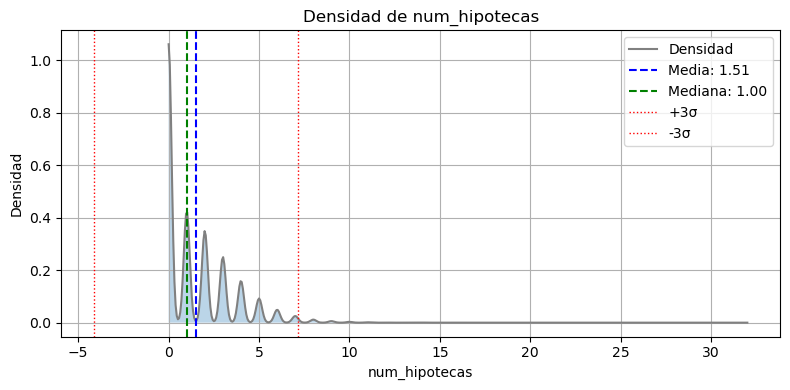

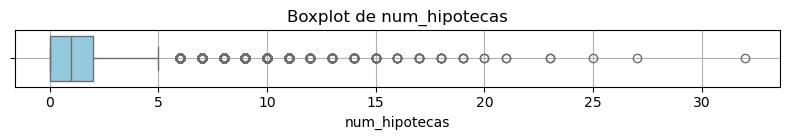

📝 CONCLUSIONES:
• Distribución razonable para modelado directo.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: NUM_LINEAS_CREDITO


,count,mean,std,min,25%,50%,75%,max
num_lineas_credito,198679.00,11.61,5.63,0.00,8.00,11.00,14.00,91.00


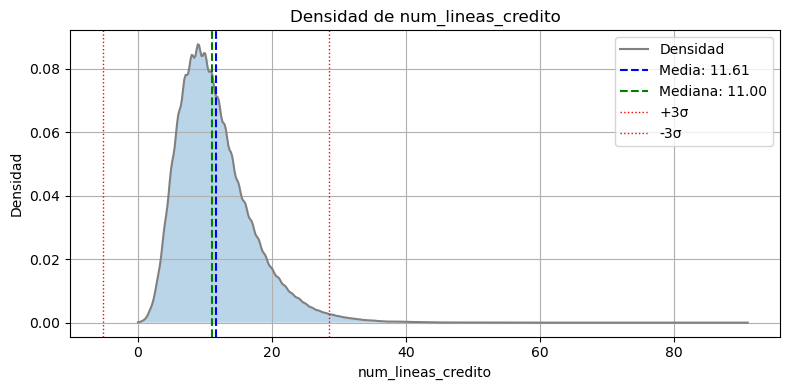

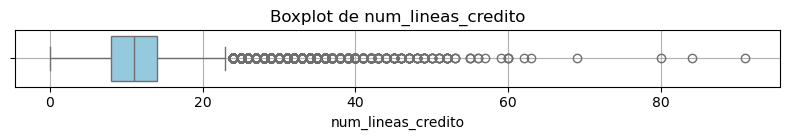

📝 CONCLUSIONES:
• Distribución razonable para modelado directo.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: PORC_TARJETAS_75P


,count,mean,std,min,25%,50%,75%,max
porc_tarjetas_75p,198679.00,41.08,36.45,0.00,0.00,33.30,66.70,100.00


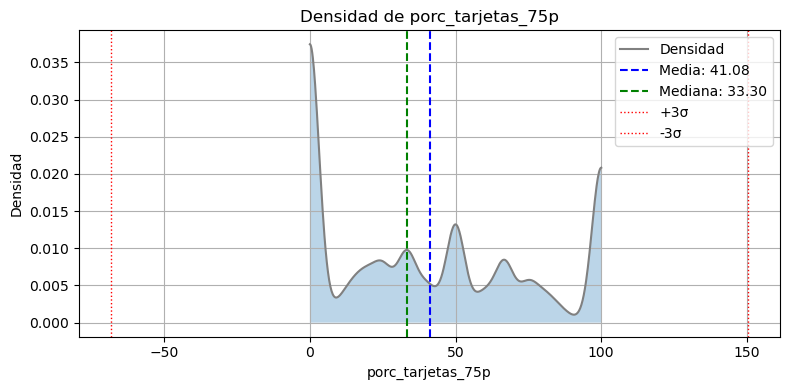

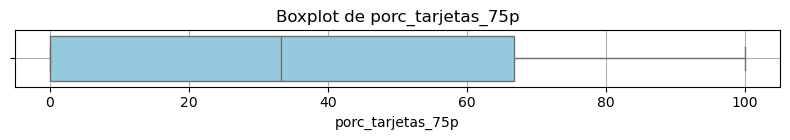

📝 CONCLUSIONES:
• Distribución razonable para modelado directo.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: PORC_USO_REVOLVING


,count,mean,std,min,25%,50%,75%,max
porc_uso_revolving,198679.00,50.30,24.69,0.00,31.60,50.30,69.30,366.60


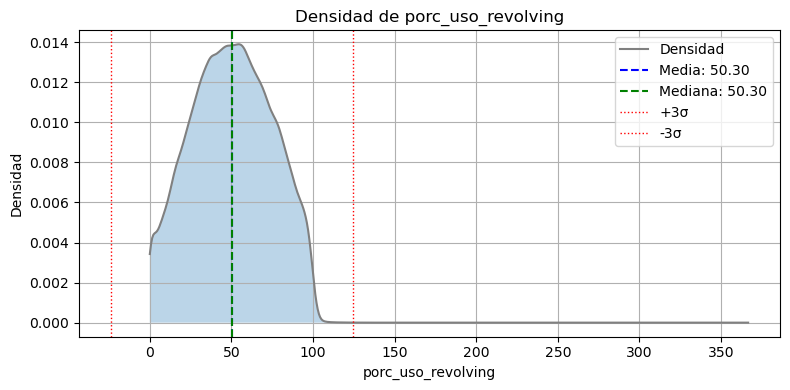

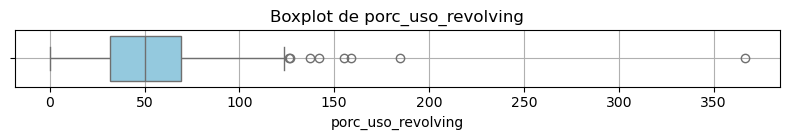

📝 CONCLUSIONES:
• Distribución razonable para modelado directo.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: NUM_CANCELACIONES_12MESES


,count,mean,std,min,25%,50%,75%,max
num_cancelaciones_12meses,198679.00,0.01,0.10,0.00,0.00,0.00,0.00,7.00


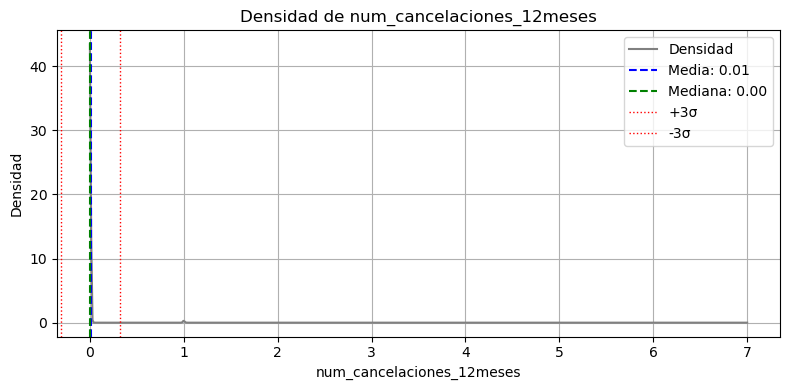

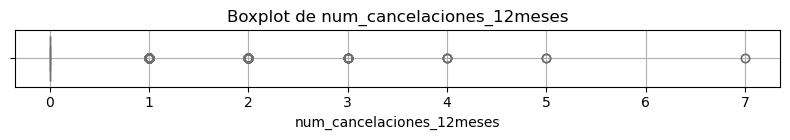

📝 CONCLUSIONES:
• Distribución muy asimétrica. Puede requerir transformación logarítmica.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: NUM_DEROGATORIOS


,count,mean,std,min,25%,50%,75%,max
num_derogatorios,198679.00,0.20,0.56,0.00,0.00,0.00,0.00,46.00


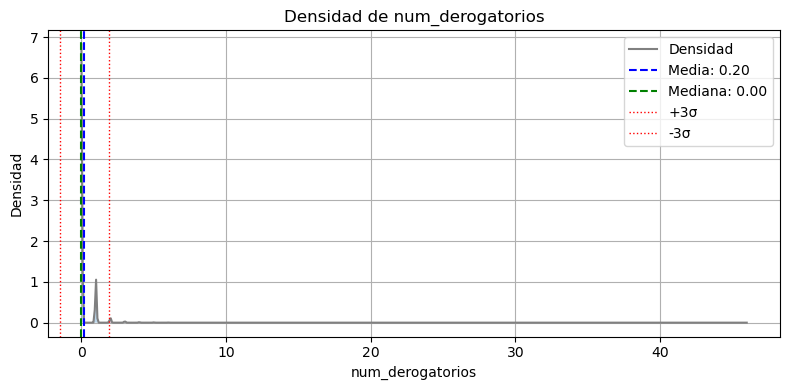

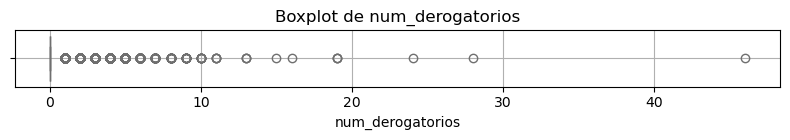

📝 CONCLUSIONES:
• Distribución muy asimétrica. Puede requerir transformación logarítmica.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: NUM_MESES_DESDE_ULT_RETRASO


,count,mean,std,min,25%,50%,75%,max
num_meses_desde_ult_retraso,198679.00,16.79,23.02,0.00,0.00,0.00,31.00,195.00


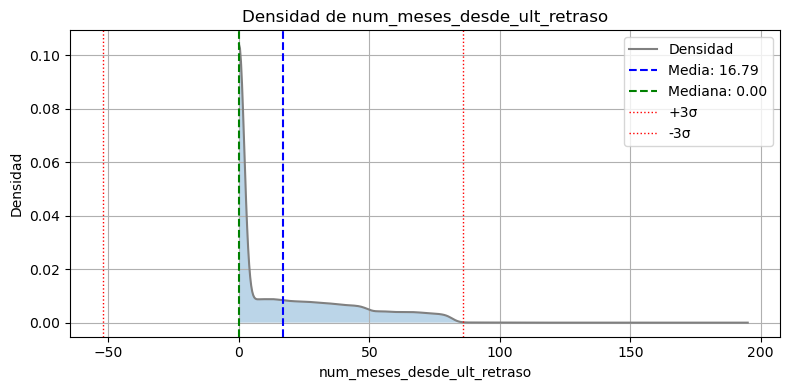

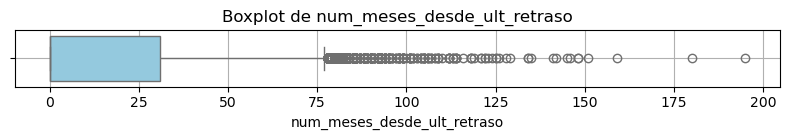

📝 CONCLUSIONES:
• Distribución razonable para modelado directo.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: PRINCIPAL


,count,mean,std,min,25%,50%,75%,max
principal,198679.00,14977.12,9133.89,500.00,8000.00,12800.00,20000.00,40000.00


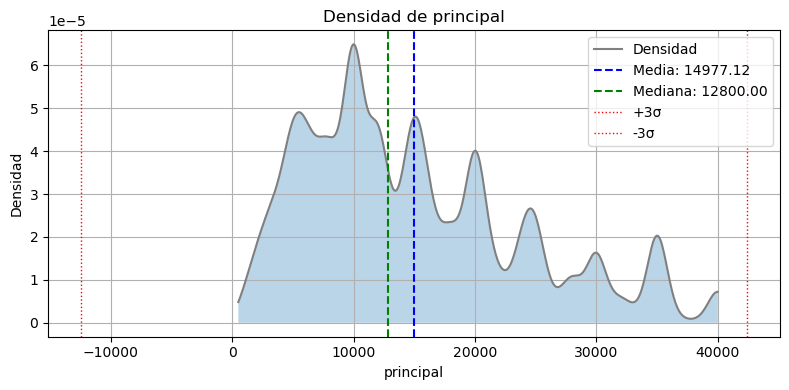

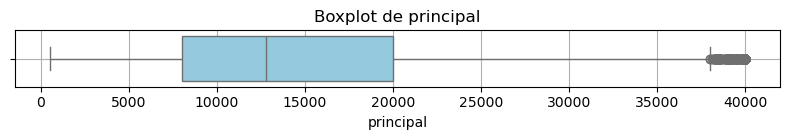

📝 CONCLUSIONES:
• Alto rango de valores. Puede ser útil aplicar escalado.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: TIPO_INTERES


,count,mean,std,min,25%,50%,75%,max
tipo_interes,198679.00,13.10,4.83,5.31,9.49,12.62,15.99,30.99


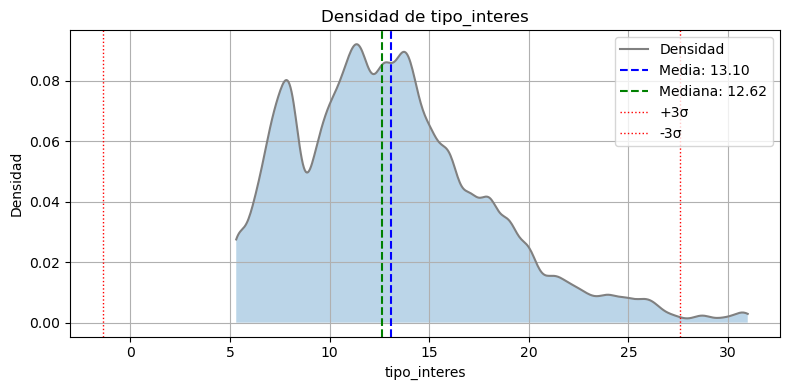

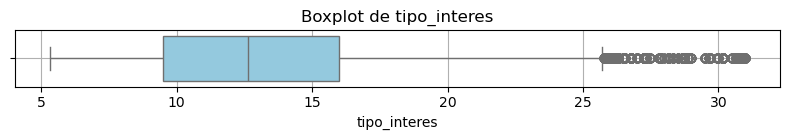

📝 CONCLUSIONES:
• Distribución razonable para modelado directo.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: NUM_CUOTAS


,count,mean,std,min,25%,50%,75%,max
num_cuotas,198679.00,42.87,10.85,36.00,36.00,36.00,60.00,60.00


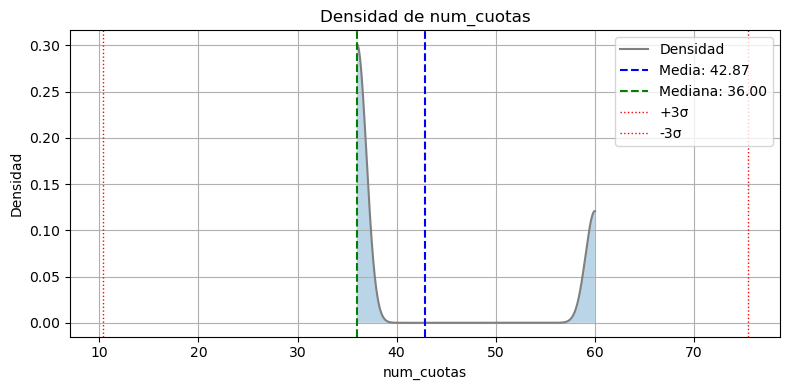

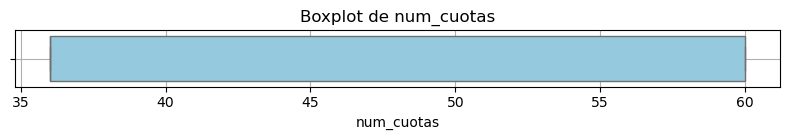

📝 CONCLUSIONES:
• Distribución razonable para modelado directo.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: IMP_CUOTA


,count,mean,std,min,25%,50%,75%,max
imp_cuota,198679.00,444.30,265.78,7.61,251.36,377.27,589.35,1714.54


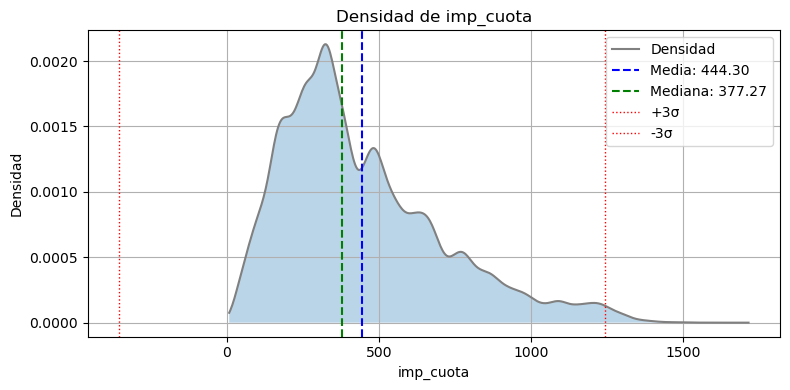

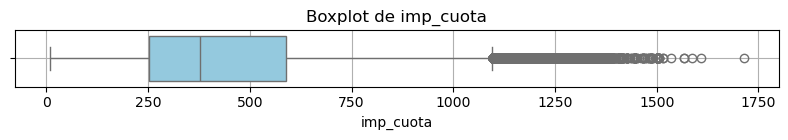

📝 CONCLUSIONES:
• Distribución razonable para modelado directo.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: IMP_AMORTIZADO


,count,mean,std,min,25%,50%,75%,max
imp_amortizado,198679.00,9467.32,8265.01,0.00,3000.00,7000.00,13727.29,40000.00


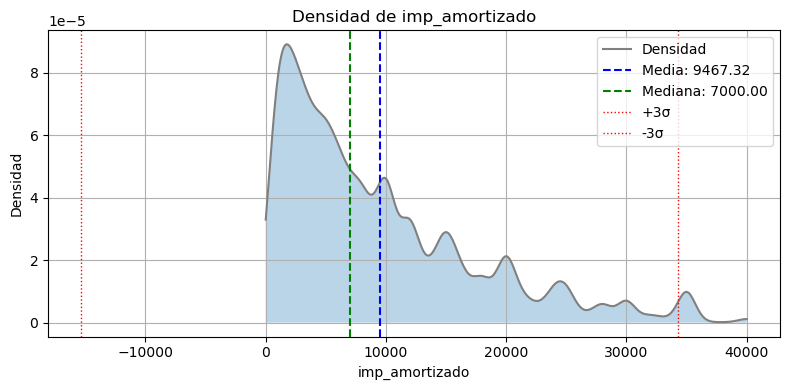

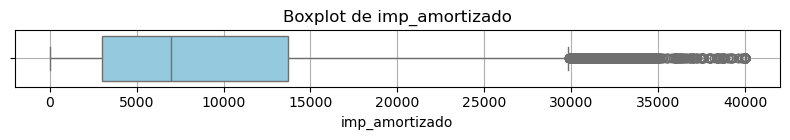

📝 CONCLUSIONES:
• Alto rango de valores. Puede ser útil aplicar escalado.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


📌 Variable numérica: IMP_RECUPERADO


,count,mean,std,min,25%,50%,75%,max
imp_recuperado,198679.00,144.95,761.97,0.00,0.00,0.00,0.00,33666.34


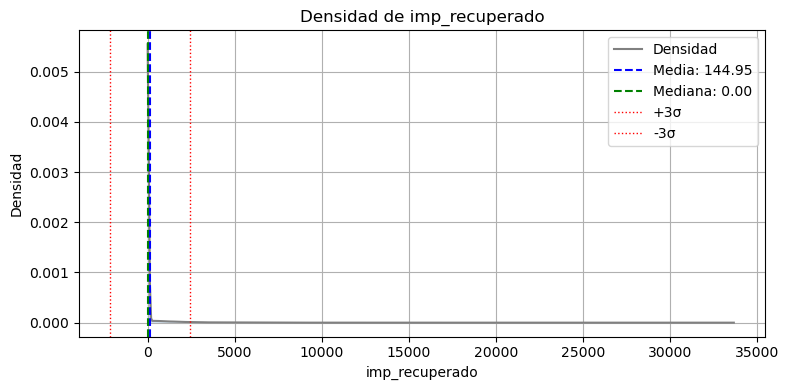

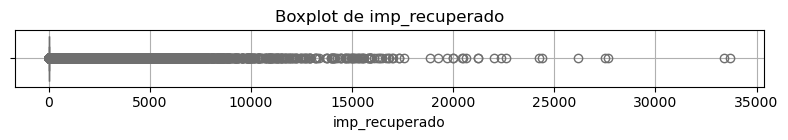

📝 CONCLUSIONES:
• Distribución muy asimétrica. Puede requerir transformación logarítmica.
🛠️ ACCIONES A REALIZAR:
• Evaluar log-transformación, normalización o estandarización en 04_feature_engineering.ipynb.


In [7]:
# =============================================================
# 📈 Análisis univariado de variables numéricas
# -------------------------------------------------------------
# ➤ Visualiza distribución con curvas de densidad y ±3σ.
# ➤ Complementa con boxplot y describe().T por variable.
# ➤ Incluye conclusiones y acciones recomendadas.
# =============================================================

from eda import analizar_numericas_univariado

analizar_numericas_univariado(num)


In [8]:
# ================================================== #
# SINCRONIZAR DATAFRAMES
# ================================================== #

# Guardar dimensiones antes del filtrado
dim_df_antes = df.shape
dim_cat_antes = cat.shape
dim_num_antes = num.shape

# Sincronizar cat y num con los índices actuales de df
cat = cat.loc[df.index].copy()
num = num.loc[df.index].copy()

# Guardar dimensiones después del filtrado
dim_df_despues = df.shape
dim_cat_despues = cat.shape
dim_num_despues = num.shape

print(f"\n✅ Dimensiones antes del filtrado: df={dim_df_antes}, cat={dim_cat_antes}, num={dim_num_antes}")
print(f"✅ Dimensiones después del filtrado: df={dim_df_despues}, cat={dim_cat_despues}, num={dim_num_despues}")


✅ Dimensiones antes del filtrado: df=(198679, 22), cat=(198679, 6), num=(198679, 16)
✅ Dimensiones después del filtrado: df=(198679, 22), cat=(198679, 6), num=(198679, 16)


## ✅ Conclusiones finales del EDA y pasos para la ingeniería de variables

Tras el análisis exploratorio, se establecen las siguientes acciones para preparar los datos en el notebook `04_feature_engineering.ipynb`:

### 🎯 Variable objetivo
- `estado`: Transformar a variable binaria: 1 para impago (`Charged Off`, `Default`, etc.), 0 para el resto.

### ✅ Variables seleccionadas para incluir directamente en el modelo:
Estas variables muestran buen poder discriminativo y tienen sentido de negocio:
- `ingresos`, `antiguedad_empleo`, `dti`, `principal`: aplicar **escalado o transformación logarítmica** si presentan asimetría.
- `empleo`: agrupar categorías poco frecuentes como `'OTROS'`.
- `rating`: codificación ordinal según riesgo (por ejemplo: A < B < C...).
- `ingresos_verificados`: codificación ordinal o dummies si necesario.

### 🟡 Variables recomendadas a evaluar:
- `vivienda`, `finalidad`, `tipo_interes`: codificar como dummies o agrupar según frecuencia.
- `num_hipotecas`, `num_lineas_credito`, `porc_tarjetas_75p`, `porc_uso_revolving`, `num_cancelaciones_12meses`, `num_derogatorios`, `num_meses_desde_ult_retraso`: revisar distribución, imputar nulos si los hay y escalar si se incluyen.
- `num_cuotas`: correlación alta con duración e importe. Revisar colinealidad.
- `imp_cuota`, `imp_amortizado`, `imp_recuperado`: derivadas de otras. Evaluar si aportan información adicional.

### 🚫 Variables excluidas:
- Variables no presentes en el dataset o sin relevancia predictiva.

Estas decisiones sentarán las bases para aplicar ingeniería de variables efectiva, robusta y alineada con los objetivos del modelo de scoring.

---
## 🔀 Guardar copia de DataFrame para trabajo
---

In [9]:
# =============================================================
# 💾 Guardado de datos tras limpieza
# -------------------------------------------------------------
# ➤ Se guardan los DataFrames procesados:
#     - `df`: datos combinados
#     - `cat`: solo variables categóricas
#     - `num`: solo variables numéricas
# ➤ Cada uno se guarda en:
#     - Formato binario (.pkl) en data/cache
#     - Formato texto (.csv) en data/processed
# =============================================================

from utils import guardar_multiples_archivos

guardar_multiples_archivos({"trabajo_eda": df, "cat_eda": cat, "num_eda": num})

✅ Archivo guardado en: data/cache/trabajo_eda.pkl
✅ Archivo guardado en: data/processed/trabajo_eda.csv
✅ Archivo guardado en: data/cache/cat_eda.pkl
✅ Archivo guardado en: data/processed/cat_eda.csv
✅ Archivo guardado en: data/cache/num_eda.pkl
✅ Archivo guardado en: data/processed/num_eda.csv
